In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
%matplotlib inline
import math

In [6]:
rb= pd.read_csv('../input/rb/dk_stats_loc.csv')

In [20]:
rb['salary'].replace('null',0, inplace=True)

In [21]:
# Convert attributes from to correct data type

rb['salary'] = rb['salary'].apply(lambda x: int(x))
rb['h/a_1'] = rb['h/a_1'].astype('category')
rb['surface_0'] = rb['surface_0'].astype('category')
rb['def_rk'] = rb['def_rk'].astype('category')
rb['PlayerID'] = rb['PlayerID'].astype('category')

In [337]:
rb= rb.sort_values('year').reset_index(drop=True)

In [8]:
rb.head()

,year,PlayerID,Name,Team,Week,Opponent,att,yds,yds/att,td,tar,rec,rec_yds,rec_td,fum,def_rk,h/a_1,surface_0,salary,points
0,2015,733,Jerome Felton,BUF,1,IND,0,0,0.0,0,1,0,0,0,0,18,1.0,0.0,3000,0.0
1,2015,1589,John Kuhn,GB,1,CHI,0,0,0.0,0,0,0,0,0,0,22,0.0,1.0,3000,0.0
2,2015,2699,Matt Forte,CHI,1,GB,24,141,5.9,1,8,5,25,0,0,13,1.0,1.0,3000,30.6
3,2015,3382,Marcel Reece,OAK,1,CIN,0,0,0.0,0,4,3,26,2,0,15,1.0,1.0,7800,17.6
4,2015,4640,Reggie Bush,SF,1,MIN,2,8,4.0,0,1,0,0,0,0,9,1.0,1.0,3000,0.8


In [22]:
rb.dtypes

year            int64
PlayerID     category
Name           object
Team           object
Week            int64
Opponent       object
att             int64
yds             int64
yds/att       float64
td              int64
tar             int64
rec             int64
rec_yds         int64
rec_td          int64
fum             int64
def_rk       category
h/a_1        category
surface_0    category
salary          int64
points        float64
dtype: object

In [384]:
# The home or away, surafce, and defensive rank variables are categorical attributes and should not be treated as numeric

for col in ['h/a_1','surface_0','def_rk']:
    rb[col] = rb[col].astype('category')

In [385]:
# A broad overview of the dataset


rb.describe()

,year,PlayerID,Week,att,yds,yds/att,td,tar,rec,rec_yds,rec_td,fum,salary,points
count,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.00000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000,4737.000000
mean,2016.141018,14785.294701,8.527127,7.913236,32.397509,3.456618,0.21997,2.478784,1.842094,15.059531,0.073042,0.056998,3913.510661,8.524931
std,0.951284,3854.490207,5.136950,7.164827,35.455341,3.056805,0.50937,2.449840,1.976845,19.917234,0.274449,0.239038,1356.781587,8.236432
min,2015.000000,733.000000,1.000000,0.000000,-11.000000,-10.000000,0.00000,0.000000,0.000000,-8.000000,0.000000,0.000000,0.000000,-1.800000
25%,2015.000000,13418.000000,4.000000,2.000000,4.000000,1.800000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,3000.000000,2.200000
50%,2016.000000,15645.000000,8.000000,6.000000,21.000000,3.300000,0.00000,2.000000,1.000000,8.000000,0.000000,0.000000,3300.000000,6.100000
75%,2017.000000,16934.000000,13.000000,13.000000,49.000000,4.700000,0.00000,4.000000,3.000000,22.000000,0.000000,0.000000,4500.000000,12.500000
max,2018.000000,20562.000000,17.000000,38.000000,236.000000,56.000000,3.00000,20.000000,15.000000,158.000000,3.000000,2.000000,10000.000000,55.600000


There were 6290 running backs that were on active rosters for 8.5 games per player from 2015 through 2018. They 

### Receiving Backs
Receiving backs are defined as rnnning backs with no rushing attempts, has receiving targets

In [114]:
rec_backs = no_rush[no_rush['tar'] != 0]

rec_backs = rec_backs.sort_values('tar', ascending=False)

rec_backs = rec_backs.reset_index(drop=True)
rec_backs.count()

year         0
PlayerID     0
Name         0
Team         0
Week         0
Opponent     0
att          0
yds          0
yds/att      0
td           0
tar          0
rec          0
rec_yds      0
rec_td       0
fum          0
def_rk       0
h/a_1        0
surface_0    0
salary       0
points       0
dtype: int64

## DNP

Running Backs that do not have any rushing attempts and no receiving targets are considered as Did Not Participate (DNP)

In [54]:
no_rush=[]
for idx,att in enumerate(rb['att']):
    if att == 0:
        no_rush.append(idx)

rb.drop(no_rush, inplace=True)

no_rushes = rb[rb['att']==0]
no_rushes.reset_index(inplace=True, drop=True)

dnp_idx = []
for idx, tar in enumerate(no_rushes['tar']):
    if tar==0:
        dnp_idx.append(idx)

receiving_backs = no_rushes.drop(dnp_idx)

rb = pd.concat([rb,receiving_backs])

In [56]:

rb.shape

(4228, 20)

After removing the 1553 DNP players the numbers look more reasonable. There were 4737 running backs that played in games from 2015 through 2018. The players, on average, played in 8.5 games, had 8 rushing attempts for 32 yards for a rate of 3.4 yards/attempt. They averaged a measly .22 touchdowns per player. They were targeted 2.5 times per player and had 1.85 receptions for 15 yards/reception, pretty good. On average they do not catch alot of touchdown passes at a rate of .07 per player and are extremely reliable with the football only losing a fumble .06 times per player. The competing players have cost an average of $3913.52 and have only averaged 8.52 fantasy points per player

## Data Visualization

In [411]:
cat_cols = ['h/a_1','surface_0','def_rk']

In [148]:
rec_cols =[]
rushing_cols = []
for col in rb.columns:
    if 'rec' in col:
        rec_cols.append(col)
    else:
        rushing_cols.append(col)

In [149]:
drop_lst = ['year','PlayerID','Name','Week','Opponent','Team','salary','h/a_1','surface_0','def_rk','tar']
for val in drop_lst:
    rushing_cols.remove(val)


In [150]:
rec_cols.append('tar')
#rec_cols.append('Name')
#rec_cols.append('year')
rec_cols.append('points')

In [151]:
rushing_cols

['att', 'yds', 'yds/att', 'td', 'fum', 'points']

In [409]:
not_rushing = ['tar','PlayerID','salary','h/a_1','surface_0','def_rk']
for val in not_rushing:
    rushing_cols.remove(val)

In [412]:
rb[rushing_cols].head()

,year,Name,Team,Week,Opponent,att,yds,yds/att,td,fum,points
0,2015,Matt Forte,CHI,1,GB,24,141,5.9,1,0,30.6
1,2015,CJ Spiller,NO,15,DET,2,2,1.0,0,0,3.8
2,2015,Rashad Jennings,NYG,15,CAR,16,107,6.7,1,1,19.7
3,2015,Donald Brown,LAC,15,MIA,12,90,7.5,0,0,12.4
4,2015,Darren McFadden,DAL,15,NYJ,16,100,6.2,0,0,16.3


In [366]:
rb[rec_cols].head()

,rec,rec_yds,tar,Name,points
0,5,25,8,Matt Forte,30.6
1,2,16,5,CJ Spiller,3.8
2,1,0,3,Rashad Jennings,19.7
3,2,14,3,Donald Brown,12.4
4,2,13,3,Darren McFadden,16.3


### Pair Plots# 


In [416]:
# Remove categroical variables for Pairs Plot
discrete = ['td','fum','year','rec_td','Week']
for val in discrete:
    if val in rushing_cols:
        rushing_cols.remove(val)
    elif val in rec_cols:
        rec_cols.remove(val)

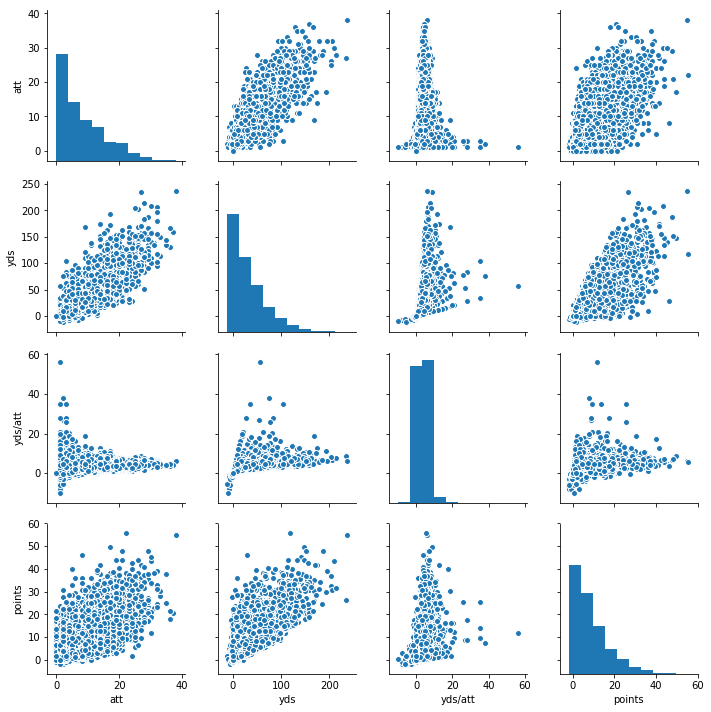

In [417]:
sns.pairplot(rb[rushing_cols])

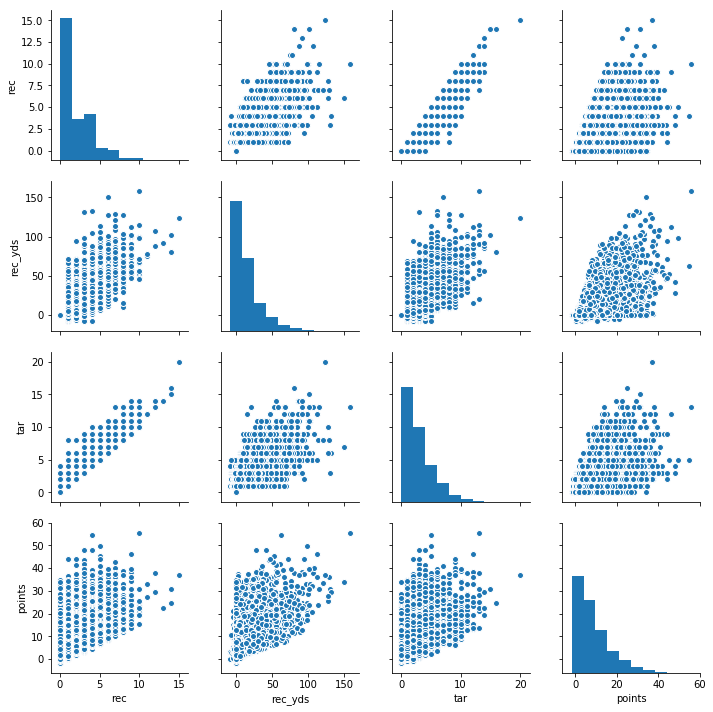

In [364]:
sns.pairplot(rb[rec_cols])

A Pair Plot shows scatter plots of all numeric variables. Since we have other methods of investigating discrete variabes we remove the discrete variables from the rushing and receiving data frames before plotting. At first glance, the pairs plot shows what we would expect. Running backs fantasy points are directly related to rushing attempts, yards, receiving targets, receptions, yards, yards per catch.

# Boxplots

Boxplots are a good way to visualize outliers wihtin a dataset. 

In [418]:
def boxplotter(data, column_name):
    fig= plt.figure(figsize=(6,4))

    ax = sns.boxplot(data[column_name], orient='v',
                    fliersize=8, linewidth=1.5, notch=False,
                    saturation=0.5)
    ax.set_title(column_name, fontsize=20)
    plt.show()

In [425]:
rushing_cols

['Name', 'Team', 'Opponent', 'att', 'yds', 'yds/att', 'points']

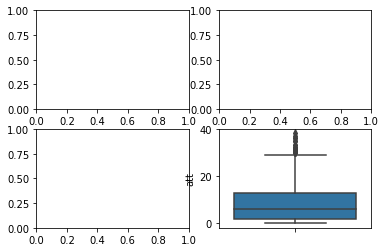

In [443]:
fig,ax = plt.subplots(2,2)
ax[0,0] = sns.boxplot(rb['att'], orient='v')

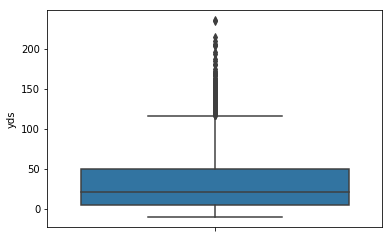

In [439]:
ax[0,1] = sns.boxplot(rb['yds'], orient='v')

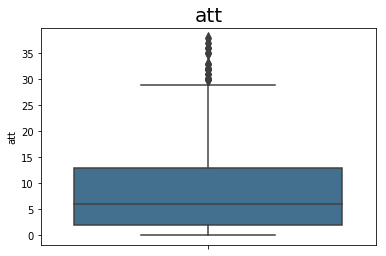

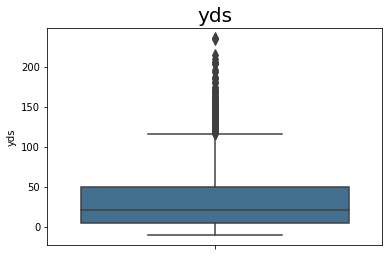

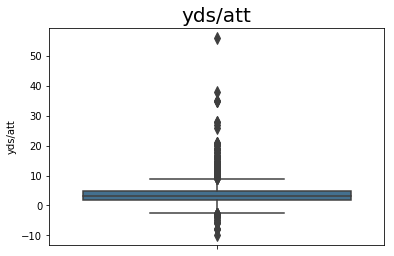

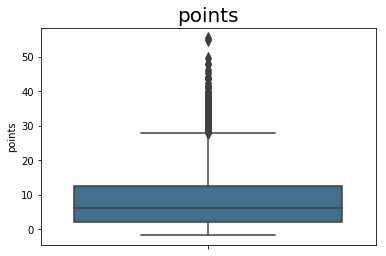

In [426]:
for col in rushing_cols[3:]:
    boxplotter(rb,col)

In [427]:
rec_cols

['rec', 'rec_yds', 'tar', 'Name', 'points']

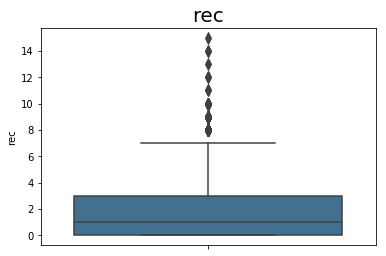

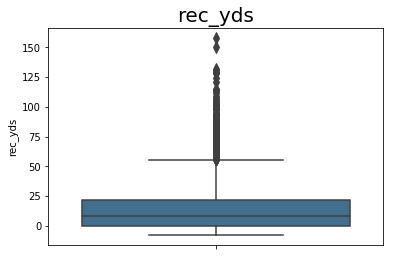

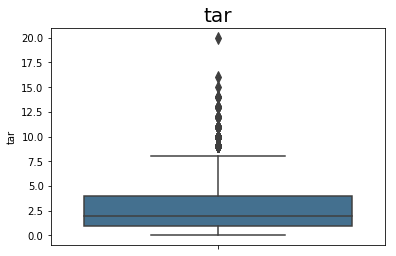

In [428]:
for col in rec_cols[:3]:
    boxplotter(rb,col)

# Histograms

(array([610.,   0., 311.,   0.,   0.,  69.,   0.,   9.,   0.,   1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

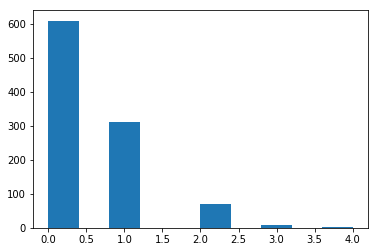

In [455]:
poisson = np.random.poisson(0.5, 1000)
plt.hist(poisson)

This is the histogram of a standard poisson distribution

(array([3878.,    0.,    0.,  701.,    0.,    0.,  133.,    0.,    0.,
          25.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

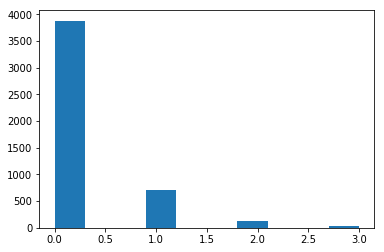

In [482]:
plt.hist(rb['td'], bins=10)

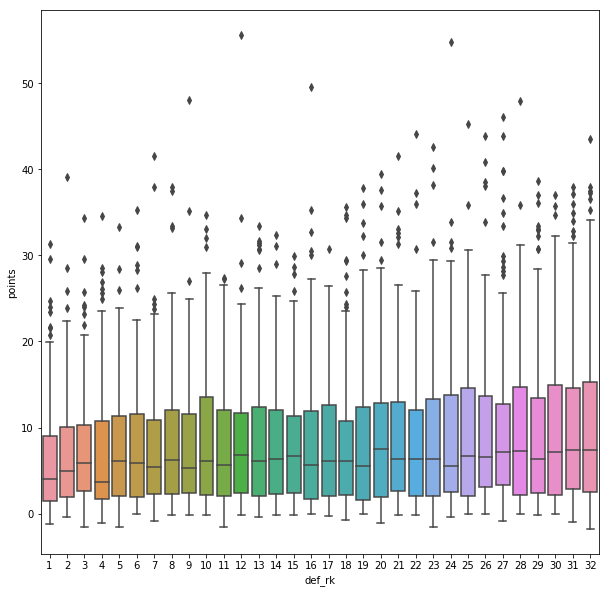

In [484]:
# Investigating the relationship of a players' opponent's defensive ranking as a function of the fantasy points scored

fig = plt.figure(figsize=(10,10))
sns.boxplot(x=rb['def_rk'], y=rb['points'])

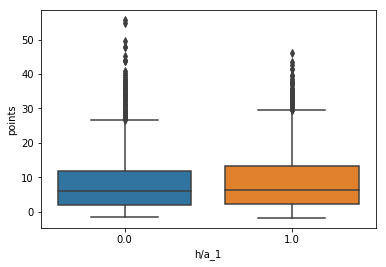

In [485]:
# Investigating the relationship betwwen type of surface, grass or turf, as a function of a player's fantasy points scored

sns.boxplot(rb['h/a_1'], rb['points'])

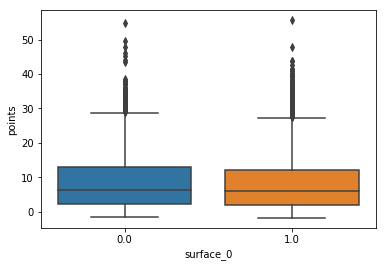

In [487]:
sns.boxplot(rb['surface_0'],rb['points'])

In [465]:
rb[rb['td']==0].count()

year         3878
PlayerID     3878
Name         3878
Team         3878
Week         3878
Opponent     3878
att          3878
yds          3878
yds/att      3878
td           3878
tar          3878
rec          3878
rec_yds      3878
rec_td       3878
fum          3878
def_rk       3878
h/a_1        3878
surface_0    3878
salary       3878
points       3878
dtype: int64

## Outliers

In [85]:
rb.dtypes

year            int64
PlayerID     category
Name           object
Team           object
Week            int64
Opponent       object
att             int64
yds             int64
yds/att       float64
td              int64
tar             int64
rec             int64
rec_yds         int64
rec_td          int64
fum             int64
def_rk       category
h/a_1        category
surface_0    category
salary          int64
points        float64
dtype: object

In [108]:
def get_outliers(df):
    #rem_cols = ['Week','Year','Name','Opponent','Team']
    col_dict ={}
    for col in df.columns:
        if df[col].dtype.name == ('int64' or 'float64'):
            col_dict.update({col:df[col].describe()})

    col_name = []
    outliers_lst = []
    for col in df.columns:
        if df[col].dtype.name == ('int64' or 'float64'):
            col_name.append(col)
            outliers_lst.append(len(abs(df[col]-col_dict[col]['mean'])[df[col] > (col_dict[col]['std'])*3]))
            
    outliers= pd.DataFrame()
    outliers['col_name'] = col_name
    outliers['# of outliers'] = outliers_lst
    


    

    percent_lst = [ ]
    for idx, val in enumerate(outliers['# of outliers']):
        percent_lst.append(val/int(rb.shape[0])*100)

    outliers['pecent'] = percent_lst
    outliers = outliers.drop(outliers.index[:2])



    return outliers

In [109]:
outliers = get_outliers(rb)
outliers

,col_name,# of outliers,pecent
2,att,245,5.794702
3,yds,228,5.392621
4,td,158,3.736991
5,tar,200,4.730369
6,rec,139,3.287606
7,rec_yds,187,4.422895
8,rec_td,294,6.953642
9,fum,260,6.149480
10,salary,1326,31.362346


Reduce outliers in attemps, yds by taking log of value

In [176]:
rb['log_att'] = rb['att'].apply(lambda x: np.log10(x))
rb['log_yds'] = rb['yds'].apply(lambda x: np.log10(x))

In [177]:
rb.head()

,year,PlayerID,Name,Team,Week,Opponent,att,yds,yds/att,td,...,rec_yds,rec_td,fum,def_rk,h/a_1,surface_0,salary,points,log_att,log_yds
2,2015,2699,Matt Forte,CHI,1,GB,24,141,5.9,1,...,25,0,0,13,1.0,1.0,3000,30.6,1.380211,2.149219
4,2015,4640,Reggie Bush,SF,1,MIN,2,8,4.0,0,...,0,0,0,9,1.0,1.0,3000,0.8,0.301030,0.903090
5,2015,4738,Mike Tolbert,CAR,1,JAX,1,12,12.0,0,...,6,0,0,27,0.0,1.0,3900,2.8,0.000000,1.079181
6,2015,4807,Adrian Peterson,MIN,1,SF,10,31,3.1,0,...,21,0,0,32,0.0,1.0,3000,8.2,1.000000,1.491362
7,2015,5451,Jonathan Stewart,CAR,1,JAX,18,56,3.1,0,...,25,0,0,27,0.0,1.0,7700,12.1,1.255273,1.748188


## Points
Investigate only the number of fantasy points scored in each obseravtion

In [141]:
players = []
avg_points =[]
for name in list(rb['Name'].unique()):
    avg_points.append(rb[rb['Name'] ==name].describe()['points'].mean())

In [142]:
rb_avg = pd.DataFrame()
rb_avg['player'] = (rb['Name'].unique())
rb_avg['avg_points']= avg_points
#rb.sort_values(rb_avg['avg_points'], ascending=False)

In [143]:
rb_avg.sort_values('avg_points',ascending=False)[:10]

,player,avg_points
104,Le'Veon Bell,25.656949
110,Todd Gurley,24.441270
207,Alvin Kamara,22.134201
162,Ezekiel Elliott,21.810083
96,David Johnson,21.676506
67,Devonta Freeman,21.230313
16,LeSean McCoy,20.322748
70,Melvin Gordon,20.023479
208,Kareem Hunt,19.516966
33,Lamar Miller,19.217330


In [153]:
rush_corr = rb[rushing_cols].corr()
rec_corr  =rb[rec_cols].corr()
rec_corr

,rec,rec_yds,rec_td,tar,points
rec,1.000000,0.812180,0.291263,0.938864,0.606251
rec_yds,0.812180,1.000000,0.355048,0.765469,0.625751
rec_td,0.291263,0.355048,1.000000,0.265406,0.401620
tar,0.938864,0.765469,0.265406,1.000000,0.579338
points,0.606251,0.625751,0.401620,0.579338,1.000000


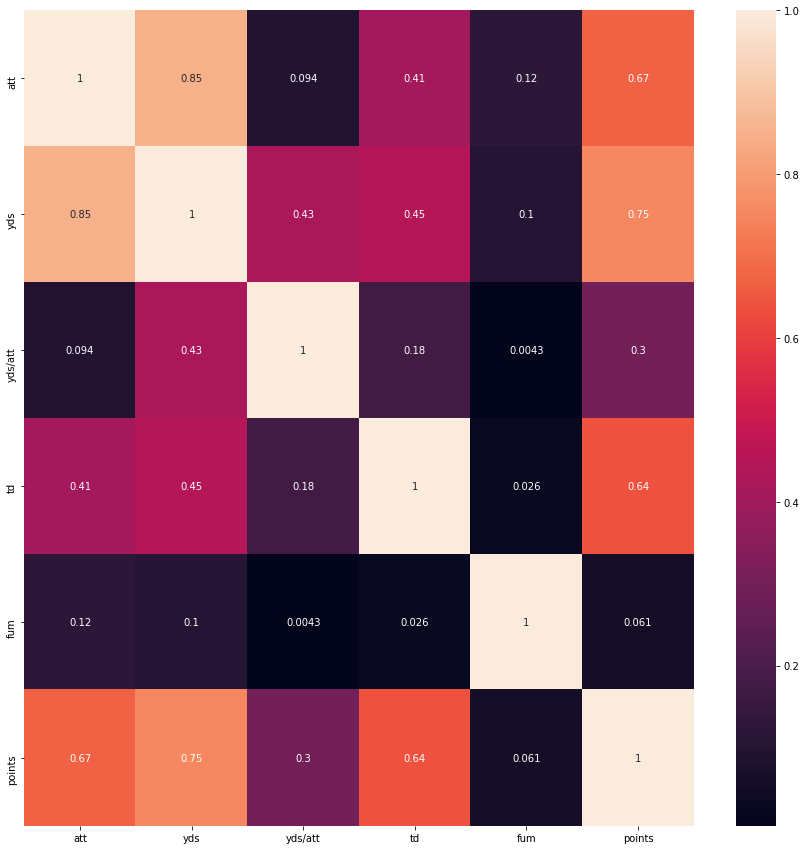

In [154]:
plt.figure(figsize=(15,15))
sns.heatmap(rush_corr, annot=True)

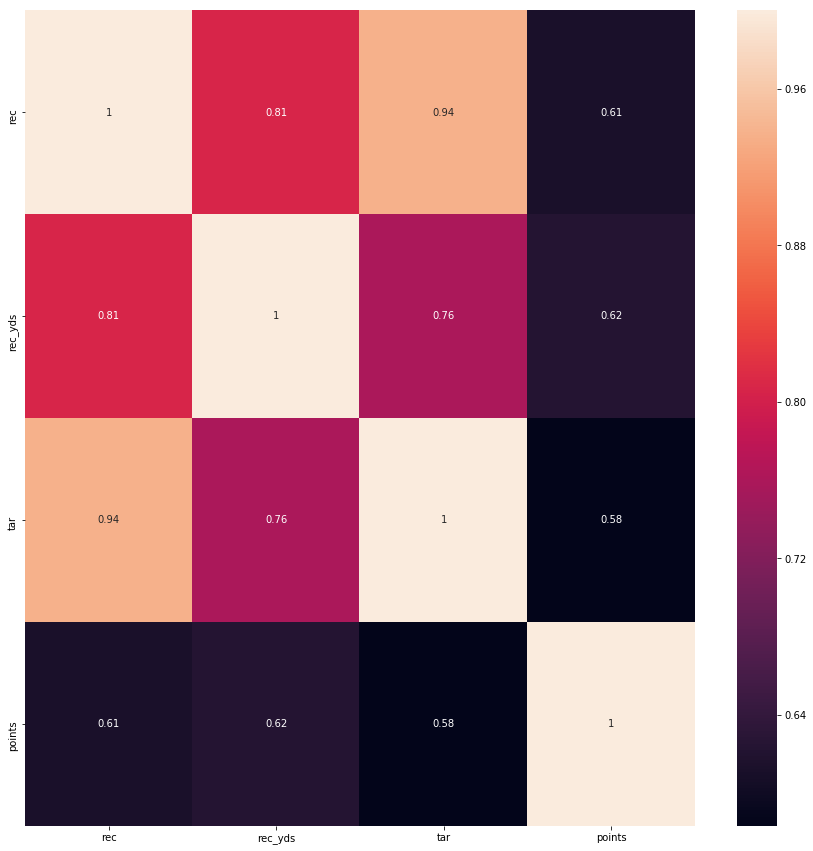

In [497]:
plt.figure(figsize=(15,15))
sns.heatmap(rec_corr, annot=True)

In [155]:
corr = pd.DataFrame(index=rb.columns[4:])

In [156]:
rb.head()

,year,PlayerID,Name,Team,Week,Opponent,att,yds,yds/att,td,tar,rec,rec_yds,rec_td,fum,def_rk,h/a_1,surface_0,salary,points
2,2015,2699,Matt Forte,CHI,1,GB,24,141,5.9,1,8,5,25,0,0,13,1.0,1.0,3000,30.6
4,2015,4640,Reggie Bush,SF,1,MIN,2,8,4.0,0,1,0,0,0,0,9,1.0,1.0,3000,0.8
5,2015,4738,Mike Tolbert,CAR,1,JAX,1,12,12.0,0,2,1,6,0,0,27,0.0,1.0,3900,2.8
6,2015,4807,Adrian Peterson,MIN,1,SF,10,31,3.1,0,3,3,21,0,0,32,0.0,1.0,3000,8.2
7,2015,5451,Jonathan Stewart,CAR,1,JAX,18,56,3.1,0,4,4,25,0,0,27,0.0,1.0,7700,12.1


In [32]:
np.corrcoef(rb.points,)

1.0

In [114]:
corr

""
Comp
Att
Pct
Yds
Yds/Att
TD
Int
ru_att
ru_yds
yds/ru_att


In [159]:
rb.columns

Index(['year', 'PlayerID', 'Name', 'Team', 'Week', 'Opponent', 'att', 'yds',
       'yds/att', 'td', 'tar', 'rec', 'rec_yds', 'rec_td', 'fum', 'def_rk',
       'h/a_1', 'surface_0', 'salary', 'points'],
      dtype='object')

In [178]:
not_feat_eng = ['yds/att','fum','rec','rec_td']
rb_eda = rb.drop(not_feat_eng, axis=1)

In [184]:
rb_eda.drop('PlayerID',axis=1,inplace=True)

In [179]:
rb_eda.reset_index(inplace=True,drop=True)
rb_eda.head()

,year,PlayerID,Name,Team,Week,Opponent,att,yds,td,tar,rec_yds,def_rk,h/a_1,surface_0,salary,points,log_att,log_yds
0,2015,2699,Matt Forte,CHI,1,GB,24,141,1,8,25,13,1.0,1.0,3000,30.6,1.380211,2.149219
1,2015,4640,Reggie Bush,SF,1,MIN,2,8,0,1,0,9,1.0,1.0,3000,0.8,0.301030,0.903090
2,2015,4738,Mike Tolbert,CAR,1,JAX,1,12,0,2,6,27,0.0,1.0,3900,2.8,0.000000,1.079181
3,2015,4807,Adrian Peterson,MIN,1,SF,10,31,0,3,21,32,0.0,1.0,3000,8.2,1.000000,1.491362
4,2015,5451,Jonathan Stewart,CAR,1,JAX,18,56,0,4,25,27,0.0,1.0,7700,12.1,1.255273,1.748188


In [181]:
cols = rb_eda.columns.tolist()
cols = cols[:-4] + cols[-2:] +cols[-4:-2]
rb_eda = rb_eda[cols]
rb_eda.head()

,year,PlayerID,Name,Team,Week,Opponent,att,yds,td,tar,rec_yds,def_rk,h/a_1,surface_0,log_att,log_yds,salary,points
0,2015,2699,Matt Forte,CHI,1,GB,24,141,1,8,25,13,1.0,1.0,1.380211,2.149219,3000,30.6
1,2015,4640,Reggie Bush,SF,1,MIN,2,8,0,1,0,9,1.0,1.0,0.301030,0.903090,3000,0.8
2,2015,4738,Mike Tolbert,CAR,1,JAX,1,12,0,2,6,27,0.0,1.0,0.000000,1.079181,3900,2.8
3,2015,4807,Adrian Peterson,MIN,1,SF,10,31,0,3,21,32,0.0,1.0,1.000000,1.491362,3000,8.2
4,2015,5451,Jonathan Stewart,CAR,1,JAX,18,56,0,4,25,27,0.0,1.0,1.255273,1.748188,7700,12.1


In [185]:
rb_eda.to_csv('../input/rb/rb_loc_cleaned.csv',index=False)